<a href="https://colab.research.google.com/github/Dicti93/BNetzA/blob/main/Chloe/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_excel('/EVS4_20140118_dataV9.xlsx', sheet_name='DatasetV9')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 904 entries, BNR_NNR to NameShort
dtypes: float64(512), int64(389), object(3)
memory usage: 1.3+ MB


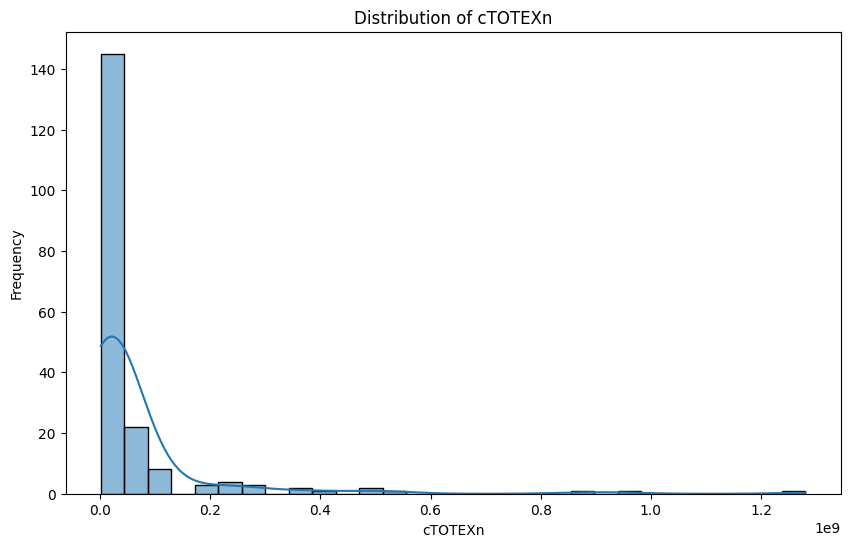

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cTOTEXn'], kde=True, bins=30)
plt.title('Distribution of cTOTEXn')
plt.xlabel('cTOTEXn')
plt.ylabel('Frequency')
plt.show()

In [7]:
cols_to_drop = ['BNR_NNR', 'NameOrg', 'NameShort', 'dmu', 'dDateData', 'cTOTEXn_RP3', 'cTOTEXs_RP3', 'cTOTEXs',  'BNR','dmuName']
df = df.drop(columns=cols_to_drop)

df.describe()

,cTOTEXn,yConnections.N1,yConnections.N2,yConnections.N3,yConnections.N4,yConnections.N5,yConnections.N6,yConnections.N7,yConnections.tot,yConnections.streetlights.dir.N7,...,rUsageHours.injection.N6,rUsageHours.injection.N7,rUsageHours.delivered.N1,rUsageHours.delivered.N2,rUsageHours.delivered.N3,rUsageHours.delivered.N4,rUsageHours.delivered.N5,rUsageHours.delivered.N6,rUsageHours.delivered.N7,rUsageHours.delivered.tot
count,194.00,194.00,194.00,194.00,194.00,194.00,194.00,194.00,194.00,194.00,...,194.00,194.00,194.00,187.00,193.00,174.00,194.00,194.00,194.00,194.00
mean,63697519.79,0.07,8.02,32.70,312.64,2774.57,13663.07,97062.07,113853.13,5868.15,...,4746.37,4951.88,82.38,133.50,2606.87,4331.57,5652.81,4859.74,5206.11,16757.09
std,151283051.49,0.54,70.53,120.46,760.38,6762.12,31339.81,225567.17,262813.16,30978.99,...,748.17,772.12,581.26,745.29,2993.42,3762.92,1067.19,730.30,763.95,4698.81
min,1432414.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6700.92
25%,9645536.56,0.00,0.00,0.00,2.25,438.25,2622.25,17650.00,21277.25,0.00,...,4490.46,4862.99,0.00,0.00,0.00,0.00,5294.71,4613.98,5096.44,13310.16
50%,15916952.48,0.00,0.00,0.00,66.50,749.00,4340.00,26533.00,32583.00,0.00,...,4839.69,5109.31,0.00,0.00,0.00,5058.87,5602.74,4934.52,5302.38,16781.89
75%,44560145.00,0.00,0.00,13.75,245.50,1704.50,10314.25,65976.00,78225.50,194.00,...,5105.80,5268.18,0.00,0.00,5201.77,5575.69,5909.63,5192.07,5480.29,19293.08
max,1280552772.14,6.00,945.00,1106.00,6162.00,56803.00,292915.00,1953427.00,2241803.00,325003.00,...,7647.03,7111.78,5355.52,5364.20,15402.13,23442.36,11028.12,7832.05,7279.78,45833.68


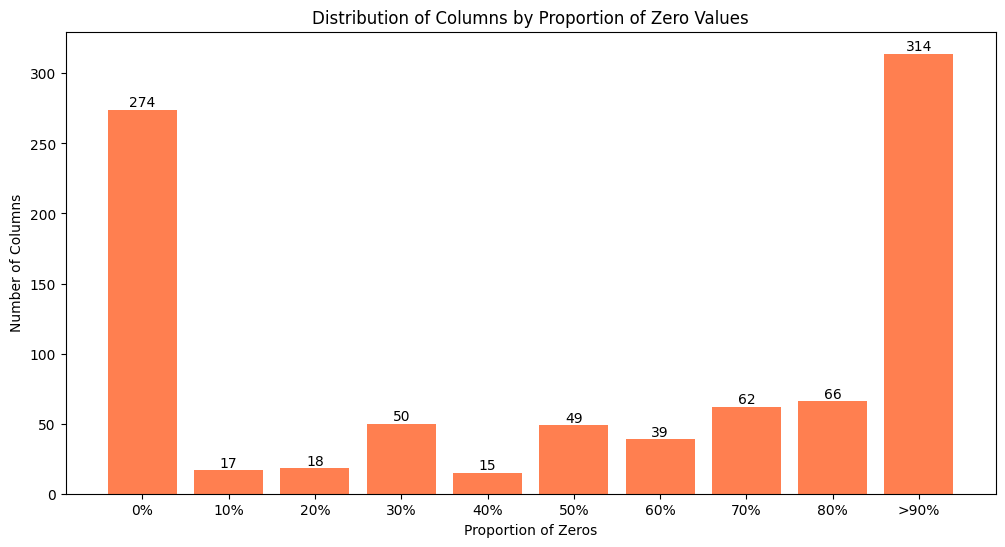

In [3]:
# Calculate the proportion of zeros in each column
zero_proportion = (df == 0).mean()

# Define bins for the proportions (10% increments)
bins = np.arange(0, 1.1, 0.1)  # Adjusted to include 1.0 explicitly

# Count the number of columns in each bin
zero_counts = np.histogram(zero_proportion, bins=bins)[0]

# Create labels for the x-axis (e.g., '0%', '10%', ..., '100%')
labels = [f'{int(x*100)}%' for x in bins[:-1]]

# Modify the label for 90% to ">90%"
labels[-1] = '>90%'

# Plot the distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, zero_counts, color='coral')

# Add text labels on top of each bar
for bar, count in zip(bars, zero_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             str(count), ha='center', va='bottom')

plt.title('Distribution of Columns by Proportion of Zero Values')
plt.xlabel('Proportion of Zeros')
plt.ylabel('Number of Columns')
plt.show()


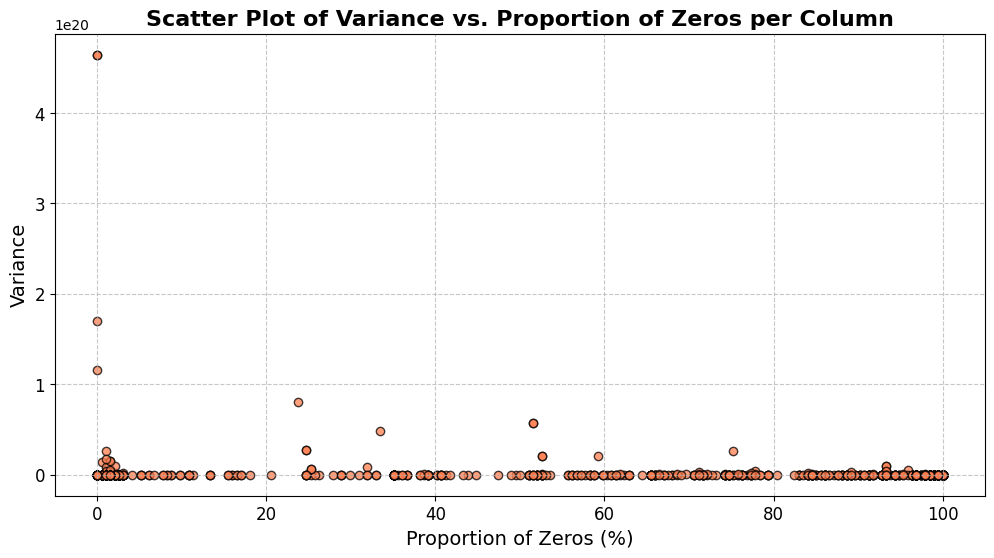

In [9]:
# Calculate the proportion of zeros in each column
zero_proportion = (df == 0).mean()

# Calculate the variance for each column
variances = df.var()

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(zero_proportion * 100, variances, color='coral', edgecolor='black', alpha=0.75)

# Add labels and title
plt.title('Scatter Plot of Variance vs. Proportion of Zeros per Column', fontsize=16, fontweight='bold')
plt.xlabel('Proportion of Zeros (%)', fontsize=14)
plt.ylabel('Variance', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


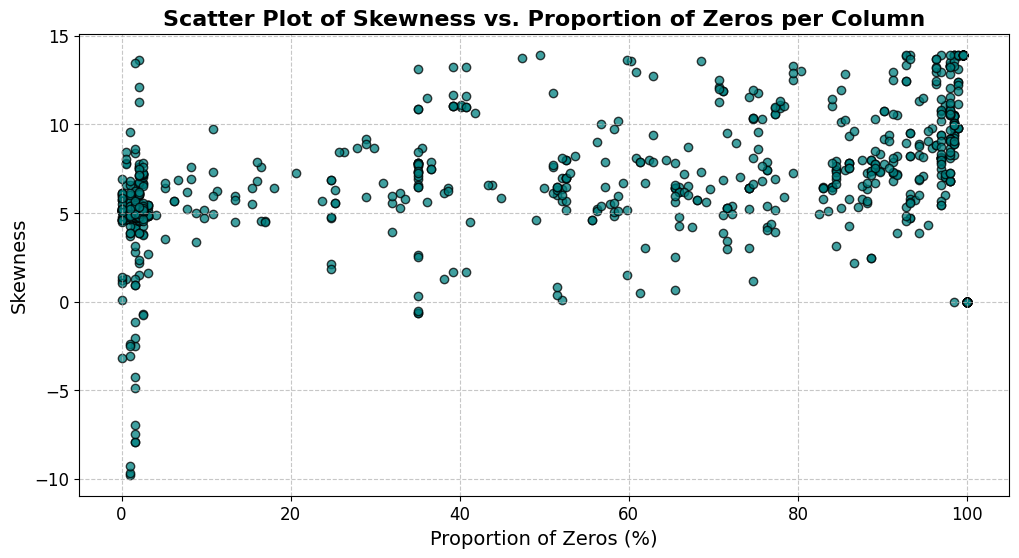

In [10]:
# Calculate the proportion of zeros in each column
zero_proportion = (df == 0).mean()

# Calculate the skewness for each column
skewness = df.skew()

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(zero_proportion * 100, skewness, color='teal', edgecolor='black', alpha=0.75)

# Add labels and title
plt.title('Scatter Plot of Skewness vs. Proportion of Zeros per Column', fontsize=16, fontweight='bold')
plt.xlabel('Proportion of Zeros (%)', fontsize=14)
plt.ylabel('Skewness', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [4]:
# Create a list of columns to keep: those with '.tot' and 'xTOTEXn'
columns_to_keep = [col for col in df.columns if '.tot' in col] + ['cTOTEXn']

# Subset the DataFrame to keep only the desired columns
df_filtered = df[columns_to_keep]

# Display the first few rows of the filtered DataFrame (for verification)
print(df_filtered.shape)

(194, 60)


In [5]:
# Calculate correlation with 'cTOTEXn'
correlation = df_filtered.corr()['cTOTEXn'].drop('cTOTEXn')

# Sort correlations from high to low
sorted_correlation = correlation.sort_values(ascending=False)

print(sorted_correlation)

yInjection.tot                                          0.98
yEnergy.delivered.tot                                   0.98
yNet.length.excl.house.tot                              0.97
yNet.length.circuit.tot                                 0.97
yTransformers.tot                                       0.96
yConnections.tot                                        0.96
yConnections.incl.inj.tot                               0.96
yConnections.excl.streetlights.tot                      0.96
yNet.length.all.tot                                     0.96
yConnections.cus.tot                                    0.96
ySubstations.own.tot                                    0.96
yEnergy.losses.tot                                      0.96
yEnergy.delivered.net.tot                               0.95
yMeters.all.tot                                         0.95
yMeters.read.tot                                        0.95
yMeters.noncp.ctrl.tot                                  0.95
yMeters.active.tot      

In [ ]:
# Select top 10 correlations
top_n = 10
top_correlations = sorted_correlation.head(top_n)

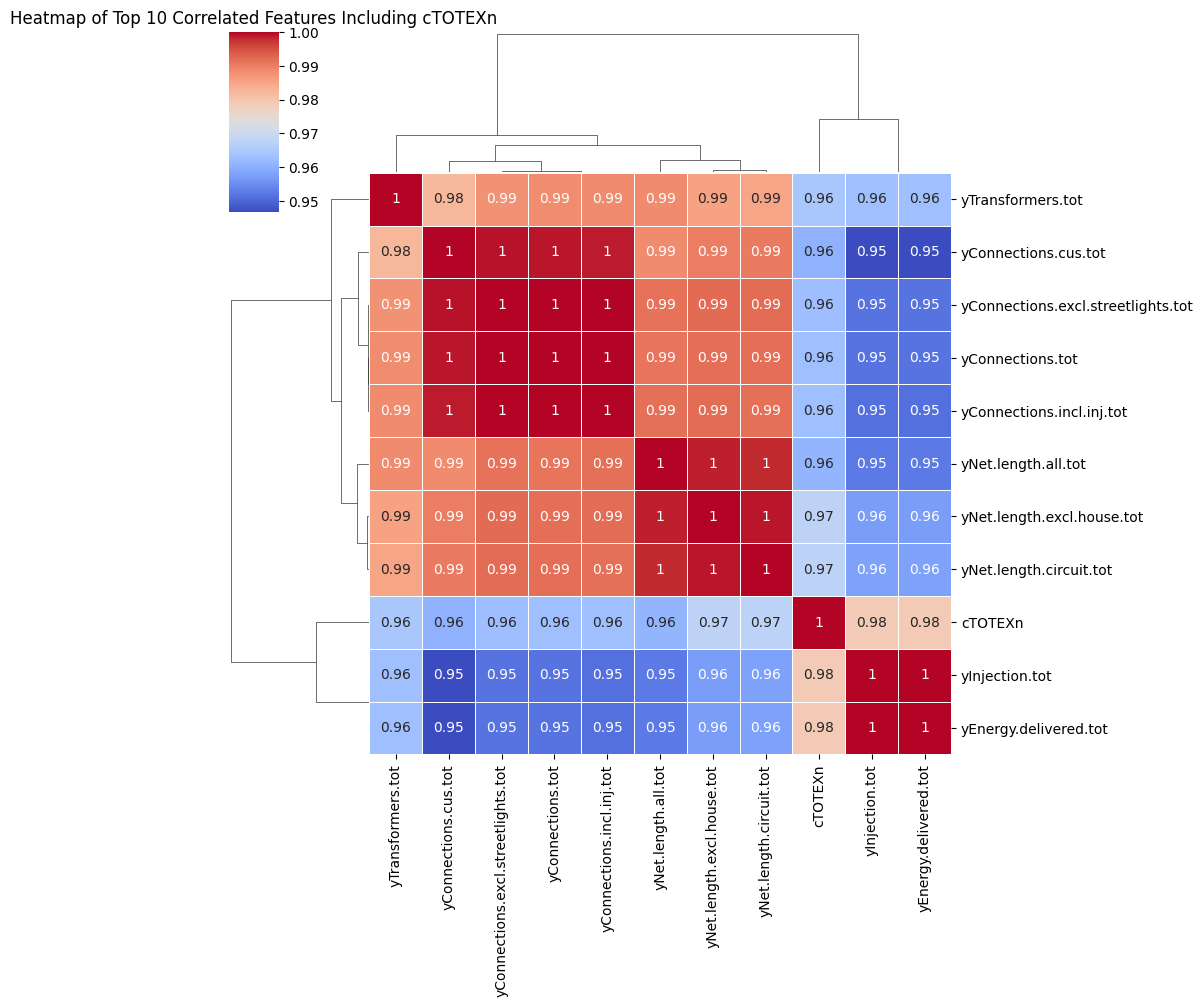

In [15]:
# Add 'cTOTEXn' to the list of top correlated features
top_features = df_filtered[top_correlations.index.tolist() + ['cTOTEXn']]

# Calculate the correlation matrix
corr_matrix = top_features.corr()

# Plot the heatmap with clustering
sns.clustermap(corr_matrix, cmap='coolwarm', annot=True, linewidths=0.5, figsize=(10, 10))
plt.title('Heatmap of Top 10 Correlated Features Including cTOTEXn')
plt.show()
